In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re #regular experssion

In [2]:
data=pd.read_csv('/content/Student Mental health.csv')

# Data Explained
This dataset contains 11 columns and 100 values taken from a survay:

1-Timestamp: time of survay.

2-Choose your gender: gender of the student.

3-Age: age of the student.

4-What is your course?: course of the student.

5-Your current year of Study.

6-What is your CGPA?

7-Marital status.

8-Do you have Anxiety?

9-Do you have Panic attack?

10- Did you seek any specialist for a treatment?

# Basic Info

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [ ]:
data.describe()

,Age
count,100.00000
mean,20.53000
std,2.49628
min,18.00000
25%,18.00000
50%,19.00000
75%,23.00000
max,24.00000


In [ ]:
data.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [ ]:
data.isna().sum()

Timestamp                                       0
Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [4]:
data.shape

(101, 11)

# Preprocessing
Applied the following processes:

1-Delete Timestamp column.

2-Fix columns' names.

3-Fix some values in dataset.

In [5]:
data=data.drop('Timestamp', axis=1)

In [6]:
#fix columns' names
data=data.rename(columns={'Choose your gender':'Gender','What is your course?':'Course',
                     'Your current year of Study':'Studying year',
                     'What is your CGPA?':'CGPA','Do you have Depression?':'Depression',
                     'Do you have Anxiety?':'Anxiety','Do you have Panic attack?':'Panic attack',
                     'Did you seek any specialist for a treatment?':'Specialist treatment',
                     'Your current year of Study':'Study year'})


In [ ]:
'''#replace female gender with value: 1
data['Gender']=data['Gender'].replace('Female',1)
#replace male gender with value: 2
data['Gender']=data['Gender'].replace('Male',2)
#replace marital status No with value: 1
data['Marital status']=data['Marital status'].replace('No',1)
#replace marital status Yes with value: 2
data['Marital status']=data['Marital status'].replace('Yes',2)
#replace Depression No with value: 1
data['Depression']=data['Depression'].replace('No',1)
#replace Depression Yes with value: 2
data['Depression']=data['Depression'].replace('Yes',2)
#replace Anxiety No with value: 1
data['Anxiety']=data['Anxiety'].replace('No',1)
#replace Anxiety Yes with value: 2
data['Anxiety']=data['Anxiety'].replace('Yes',2)
#replace Panic attack No with value: 1
data['Panic attack']=data['Panic attack'].replace('No',1)
#replace Panic attack Yes with value: 2
data['Panic attack']=data['Panic attack'].replace('Yes',2)
#replace specialist treatment No with value: 1
data['Specialist treatment']=data['Specialist treatment'].replace('No',1)
#replace specialist treatment Yes with value: 2
data['Specialist treatment']=data['Specialist treatment'].replace('Yes',2)'''

In [7]:
#replace the year with a number
for v in data['Study year']:
  num = re.findall(r'\d+', v)
  data['Study year']=data['Study year'].replace(v,int(num[0])) 


In [ ]:
data.head()

,Gender,Age,Course,Study year,CGPA,Marital status,Depression,Anxiety,Panic attack,Specialist treatment
0,Female,18.0,Engineering,1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,Islamic education,2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,BIT,1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,Laws,3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,4,3.00 - 3.49,No,No,No,No,No


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                101 non-null    object 
 1   Age                   100 non-null    float64
 2   Course                101 non-null    object 
 3   Study year            101 non-null    int64  
 4   CGPA                  101 non-null    object 
 5   Marital status        101 non-null    object 
 6   Depression            101 non-null    object 
 7   Anxiety               101 non-null    object 
 8   Panic attack          101 non-null    object 
 9   Specialist treatment  101 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 8.0+ KB


In [ ]:
data.describe()

,Age,Study year
count,100.00000,101.000000
mean,20.53000,1.970297
std,2.49628,0.994540
min,18.00000,1.000000
25%,18.00000,1.000000
50%,19.00000,2.000000
75%,23.00000,3.000000
max,24.00000,4.000000


# Statistical Operations




In [ ]:
#Most participants were 18 years old then 24 years old
data['Age'].value_counts()

18.0    32
24.0    23
19.0    21
23.0    13
20.0     6
21.0     3
22.0     2
Name: Age, dtype: int64

In [ ]:
#Most participants were taking Bachelor of Computing Science course followed by Engineering
data['Course'].value_counts()

BCS                        18
Engineering                17
BIT                        10
Biomedical science          4
KOE                         4
BENL                        2
Laws                        2
psychology                  2
Engine                      2
Islamic Education           1
Biotechnology               1
engin                       1
Econs                       1
MHSC                        1
Malcom                      1
Kop                         1
Human Sciences              1
Communication               1
Nursing                     1
Diploma Nursing             1
IT                          1
Pendidikan Islam            1
Radiography                 1
Fiqh fatwa                  1
DIPLOMA TESL                1
Koe                         1
Fiqh                        1
CTS                         1
koe                         1
Benl                        1
Kirkhs                      1
Mathemathics                1
Pendidikan islam            1
Human Reso

In [ ]:
#Number of females is bigger than males
x=data['Gender'].value_counts()
male='males:'+str(x.iloc[1])
female='females:'+str(x.iloc[0])
if x.index[0]==2:
  male='males:'+str(x.iloc[0])
  femal='females:'+str(x.iloc[1])

print(male)
print(female)


males:26
females:75


In [ ]:
#Depression level in teenagers that are 18 years old is the largest
Depression=data.loc[data['Depression']=='Yes']#choose only depression values
Depression.groupby('Age')['Depression'].value_counts()

Age   Depression
18.0  Yes           11
19.0  Yes            9
20.0  Yes            3
22.0  Yes            1
23.0  Yes            5
24.0  Yes            6
Name: Depression, dtype: int64

In [ ]:
#Anxiety level in teenagers that are 18 years old is the largest
Anxiety=data.loc[data['Anxiety']=='Yes']
Anxiety.groupby('Age')['Anxiety'].value_counts()

Age   Anxiety
18.0  Yes        14
19.0  Yes         5
20.0  Yes         3
21.0  Yes         2
23.0  Yes         2
24.0  Yes         8
Name: Anxiety, dtype: int64

In [ ]:
#Most panic attacks happen in 18-19-24 year old people
Panic_attack=data.loc[data['Panic attack']=='Yes']
Panic_attack.groupby('Age')['Panic attack'].value_counts()

Age   Panic attack
18.0  Yes             9
19.0  Yes             9
20.0  Yes             1
23.0  Yes             5
24.0  Yes             9
Name: Panic attack, dtype: int64

In [ ]:
Get_help=data.loc[data['Specialist treatment']=='Yes']

In [ ]:
#(BCS/BIT) students are the most depressed
Depression.groupby('Course')['Depression'].value_counts()

Course            Depression
ALA               Yes           1
BCS               Yes           5
BENL              Yes           2
BIT               Yes           5
Communication     Yes           1
ENM               Yes           1
Econs             Yes           1
Engineering       Yes           7
KOE               Yes           1
Law               Yes           1
Laws              Yes           1
MHSC              Yes           1
Malcom            Yes           1
Marine science    Yes           1
Nursing           Yes           1
Pendidikan islam  Yes           1
Usuluddin         Yes           1
koe               Yes           1
psychology        Yes           2
Name: Depression, dtype: int64

In [ ]:
#(BCS/BIT) students are the most anxious students
Anxiety.groupby('Course')['Anxiety'].value_counts()

Course             Anxiety
BCS                Yes        6
BENL               Yes        1
BIT                Yes        8
Communication      Yes        1
ENM                Yes        1
Econs              Yes        1
Engineering        Yes        4
Irkhs              Yes        1
Islamic education  Yes        1
KENMS              Yes        1
KOE                Yes        2
Koe                Yes        1
Kop                Yes        1
Law                Yes        1
Marine science     Yes        1
koe                Yes        1
psychology         Yes        2
Name: Anxiety, dtype: int64

In [ ]:
#(BCS/BIT) students get panic attacks the most
Panic_attack.groupby('Course')['Panic attack'].value_counts()

Course            Panic attack
ALA               Yes             1
BCS               Yes             5
BIT               Yes             4
CTS               Yes             1
Communication     Yes             1
DIPLOMA TESL      Yes             1
ENM               Yes             1
Engineering       Yes             5
Fiqh              Yes             1
Human Sciences    Yes             1
IT                Yes             1
Irkhs             Yes             1
KOE               Yes             1
Laws              Yes             1
MHSC              Yes             1
Marine science    Yes             1
Nursing           Yes             1
Pendidikan islam  Yes             1
TAASL             Yes             1
engin             Yes             1
koe               Yes             1
psychology        Yes             1
Name: Panic attack, dtype: int64

**Females get mental disorders more than males**

In [ ]:
print('Depression:')
Depression.groupby('Gender')['Depression'].value_counts()

Depression:


Gender  Depression
Female  Yes           29
Male    Yes            6
Name: Depression, dtype: int64

In [ ]:
print('Anxiety:')
Anxiety.groupby('Gender')['Anxiety'].value_counts()

Anxiety:


Gender  Anxiety
Female  Yes        24
Male    Yes        10
Name: Anxiety, dtype: int64

In [ ]:
print('Panic attacks')
Panic_attack.groupby('Gender')['Panic attack'].value_counts()

Panic attacks


Gender  Panic attack
Female  Yes             25
Male    Yes              8
Name: Panic attack, dtype: int64

In [ ]:
Get_help.groupby('Gender')['Specialist treatment'].value_counts()

Gender  Specialist treatment
1       2                       5
2       2                       1
Name: Specialist treatment, dtype: int64

In [ ]:
#Small number of students get treatment
Get_help.groupby('Age')['Specialist treatment'].value_counts()

Age   Specialist treatment
18.0  Yes                     2
19.0  Yes                     1
23.0  Yes                     1
24.0  Yes                     2
Name: Specialist treatment, dtype: int64

In [ ]:
Get_help.groupby('Course')['Specialist treatment'].value_counts()

Course       Specialist treatment
ALA          Yes                     1
BCS          Yes                     2
BIT          Yes                     1
Engineering  Yes                     1
psychology   Yes                     1
Name: Specialist treatment, dtype: int64

In [ ]:
Get_help.groupby('Gender')['Specialist treatment'].value_counts()

Gender  Specialist treatment
Female  Yes                     5
Male    Yes                     1
Name: Specialist treatment, dtype: int64

# EDA

Text(0.5, 1.0, 'Number of students who got treatment')

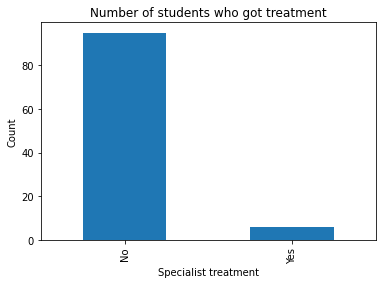

In [ ]:
data['Specialist treatment'].value_counts().plot(kind='bar')
plt.xlabel('Specialist treatment')
plt.ylabel('Count')
plt.title('Number of students who got treatment')

In [ ]:
#this plot shows that most student didn't ask for treatment

([<matplotlib.patches.Wedge at 0x7f825bb0e670>,
 [Text(-0.7594620654130827, 0.7957495656288445, 'Female'),
  Text(0.7594621399165306, -0.7957494945228709, 'Male')],
 [Text(-0.4142520356798633, 0.4340452176157333, '74.3%'),
  Text(0.4142520763181075, -0.4340451788306568, '25.7%')])

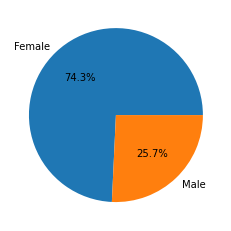

In [30]:
plt.pie(data['Gender'].value_counts(),labels=['Female','Male'],autopct='%1.1f%%')

In [ ]:
#This chart shows that most participants were females

Text(0.5, 1.0, 'Relation between marriage and depression')

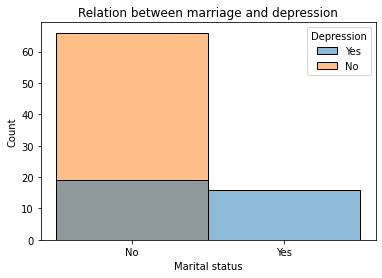

In [11]:
sns.histplot(data=data, x='Marital status',hue="Depression")
plt.title('Relation between marriage and depression')

In [ ]:
#Number of married students with depression is less than those who are single

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48],
 [Text(0, 0, 'Engineering'),
  Text(1, 0, 'Islamic education'),
  Text(2, 0, 'BIT'),
  Text(3, 0, 'Laws'),
  Text(4, 0, 'Mathemathics'),
  Text(5, 0, 'Pendidikan islam'),
  Text(6, 0, 'BCS'),
  Text(7, 0, 'Human Resources'),
  Text(8, 0, 'Irkhs'),
  Text(9, 0, 'Psychology'),
  Text(10, 0, 'KENMS'),
  Text(11, 0, 'Accounting '),
  Text(12, 0, 'ENM'),
  Text(13, 0, 'Marine science'),
  Text(14, 0, 'KOE'),
  Text(15, 0, 'Banking Studies'),
  Text(16, 0, 'Business Administration'),
  Text(17, 0, 'Law'),
  Text(18, 0, 'KIRKHS'),
  Text(19, 0, 'Usuluddin '),
  Text(20, 0, 'TAASL'),
  Text(21, 0, 'Engine'),
  Text(22, 0, 'ALA'),
  Text(23, 0, 'Biomedical science'),
  Text(24, 0, 'koe'),
  Text(25, 0, 'Kirkhs'),
 

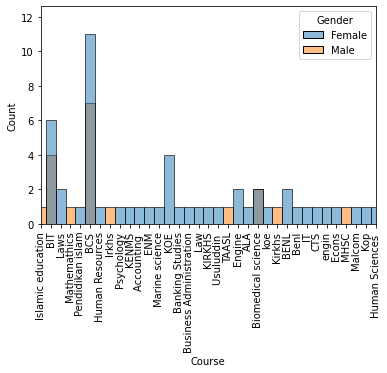

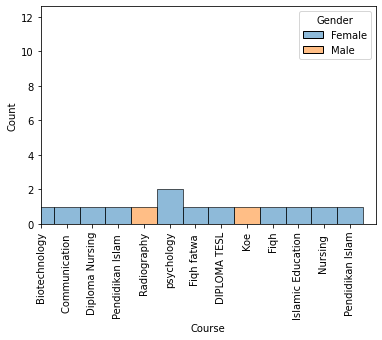

In [32]:
fig, ax = plt.subplots()
sns.histplot(data=data, x='Course',hue="Gender",ax=ax)
ax.set_xlim(1,35)
#ax[1].set_xlim(36,50)
plt.xticks(rotation = 90)

fig, ax = plt.subplots()
sns.histplot(data=data, x='Course',hue="Gender",ax=ax)
#ax.set_xlim(1,35)
ax.set_xlim(36,49)
plt.xticks(rotation = 90)

In [ ]:
#This plot indicates that most appearing course was BCS then BIT with more females than males 

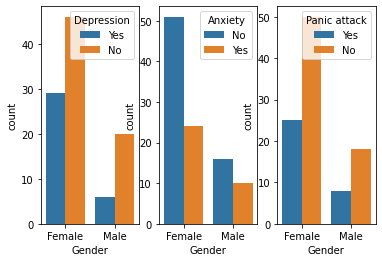

In [ ]:
plt.subplot(1,3,1)
sns.countplot(x="Gender",hue="Depression",data=data)
plt.subplot(1,3,2)
sns.countplot(x="Gender",hue="Anxiety",data=data)
plt.subplot(1,3,3)
sns.countplot(x="Gender",hue="Panic attack",data=data)
plt.show()

In [ ]:
#this plot shows that women has depression, Anxiety and Panic attacks more than men
#it also shows that anxiety is the heighest in both women and men

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48],
 [Text(0, 0, 'Engineering'),
  Text(1, 0, 'Islamic education'),
  Text(2, 0, 'BIT'),
  Text(3, 0, 'Laws'),
  Text(4, 0, 'Mathemathics'),
  Text(5, 0, 'Pendidikan islam'),
  Text(6, 0, 'BCS'),
  Text(7, 0, 'Human Resources'),
  Text(8, 0, 'Irkhs'),
  Text(9, 0, 'Psychology'),
  Text(10, 0, 'KENMS'),
  Text(11, 0, 'Accounting '),
  Text(12, 0, 'ENM'),
  Text(13, 0, 'Marine science'),
  Text(14, 0, 'KOE'),
  Text(15, 0, 'Banking Studies'),
  Text(16, 0, 'Business Administration'),
  Text(17, 0, 'Law'),
  Text(18, 0, 'KIRKHS'),
  Text(19, 0, 'Usuluddin '),
  Text(20, 0, 'TAASL'),
  Text(21, 0, 'Engine'),
  Text(22, 0, 'ALA'),
  Text(23, 0, 'Biomedical science'),
  Text(24, 0, 'koe'),
  Text(25, 0, 'Kirkhs'),
 

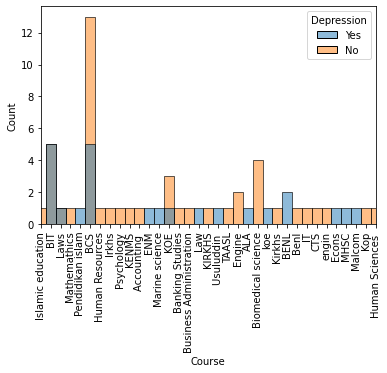

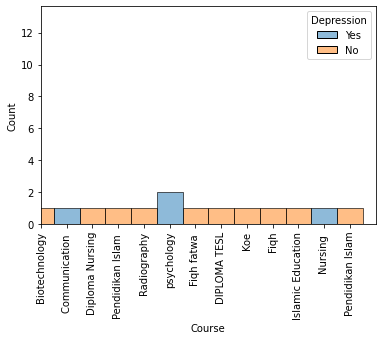

In [ ]:
fig, ax = plt.subplots()
sns.histplot(data=data, x='Course',hue="Depression",ax=ax)
ax.set_xlim(1,35)
#ax[1].set_xlim(36,50)
plt.xticks(rotation = 90)

fig, ax = plt.subplots()
sns.histplot(data=data, x='Course',hue="Depression",ax=ax)
#ax.set_xlim(1,35)
ax.set_xlim(36,49)
plt.xticks(rotation = 90)

In [ ]:
#these plots show that BCS students have more depression than others

Text(0.5, 1.0, 'Number of participating students for every age')

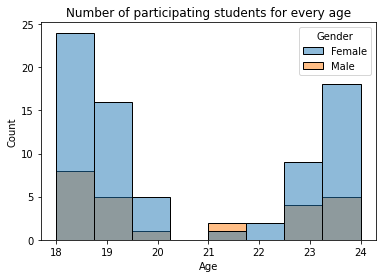

In [ ]:
sns.histplot(data=data, x='Age',hue="Gender")
plt.title('Number of participating students for every age')

In [ ]:
#This plot indicates that the most appearing age is 18 with more females participating

In [ ]:
age=[]
def concate(disorder,name):
  for d in disorder['Age']:
    #print(name,d)       
    age.append({name:d})
def returnKey(k):
  s=k.find('\'')
  e=k[s+1:].find('\'')
  return k[s+1:s+e+1]
def returnValue(v):
  s=v.find('[')
  e=v[s+1:].find(']')
  #print(v[s+1:s+e+1] )
  return float(v[s+1:s+e+1])

concate(Depression,'depression')
concate(Anxiety,'anxiety')
concate(Panic_attack,'panic attack')

d=pd.Series([returnKey(str(i.keys())) for i in age],name='Disorder')
a=pd.Series([returnValue(str(i.values())) for i in age],name='Age')

df=pd.concat([d,a],axis=1)

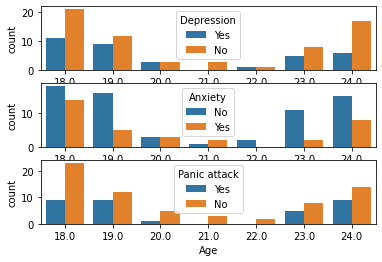

In [ ]:
plt.subplot(3,1,1)
sns.countplot(x="Age",hue="Depression",data=data)
plt.subplot(3,1,2)
sns.countplot(x="Age",hue="Anxiety",data=data)
plt.subplot(3,1,3)
sns.countplot(x="Age",hue="Panic attack",data=data)
plt.show()

In [ ]:
#these plots show that students whose age is 18 are the most depressed, anxious and had more panic attacks than others

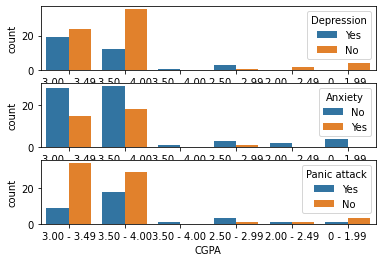

In [52]:
plt.subplot(3,1,1)
sns.countplot(x="CGPA",hue="Depression",data=data)
plt.subplot(3,1,2)
sns.countplot(x="CGPA",hue="Anxiety",data=data)
plt.subplot(3,1,3)
sns.countplot(x="CGPA",hue="Panic attack",data=data)
plt.show()

In [ ]:
#Mental disorders occure more in students with higher GPA 

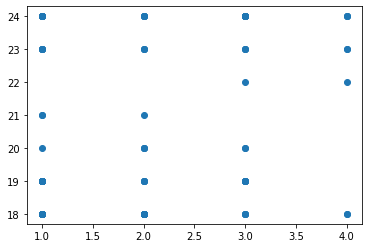

In [8]:
plt.scatter(data['Study year'],data['Age'])

In [ ]:
#This plot shows that a studient who is 18 year old is in his/her fourth year which is impossible